In [2]:
import numpy as np
import cv2
import matplotlib
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt

In [23]:
# increase dpi
matplotlib.rcParams['figure.dpi'] = 300

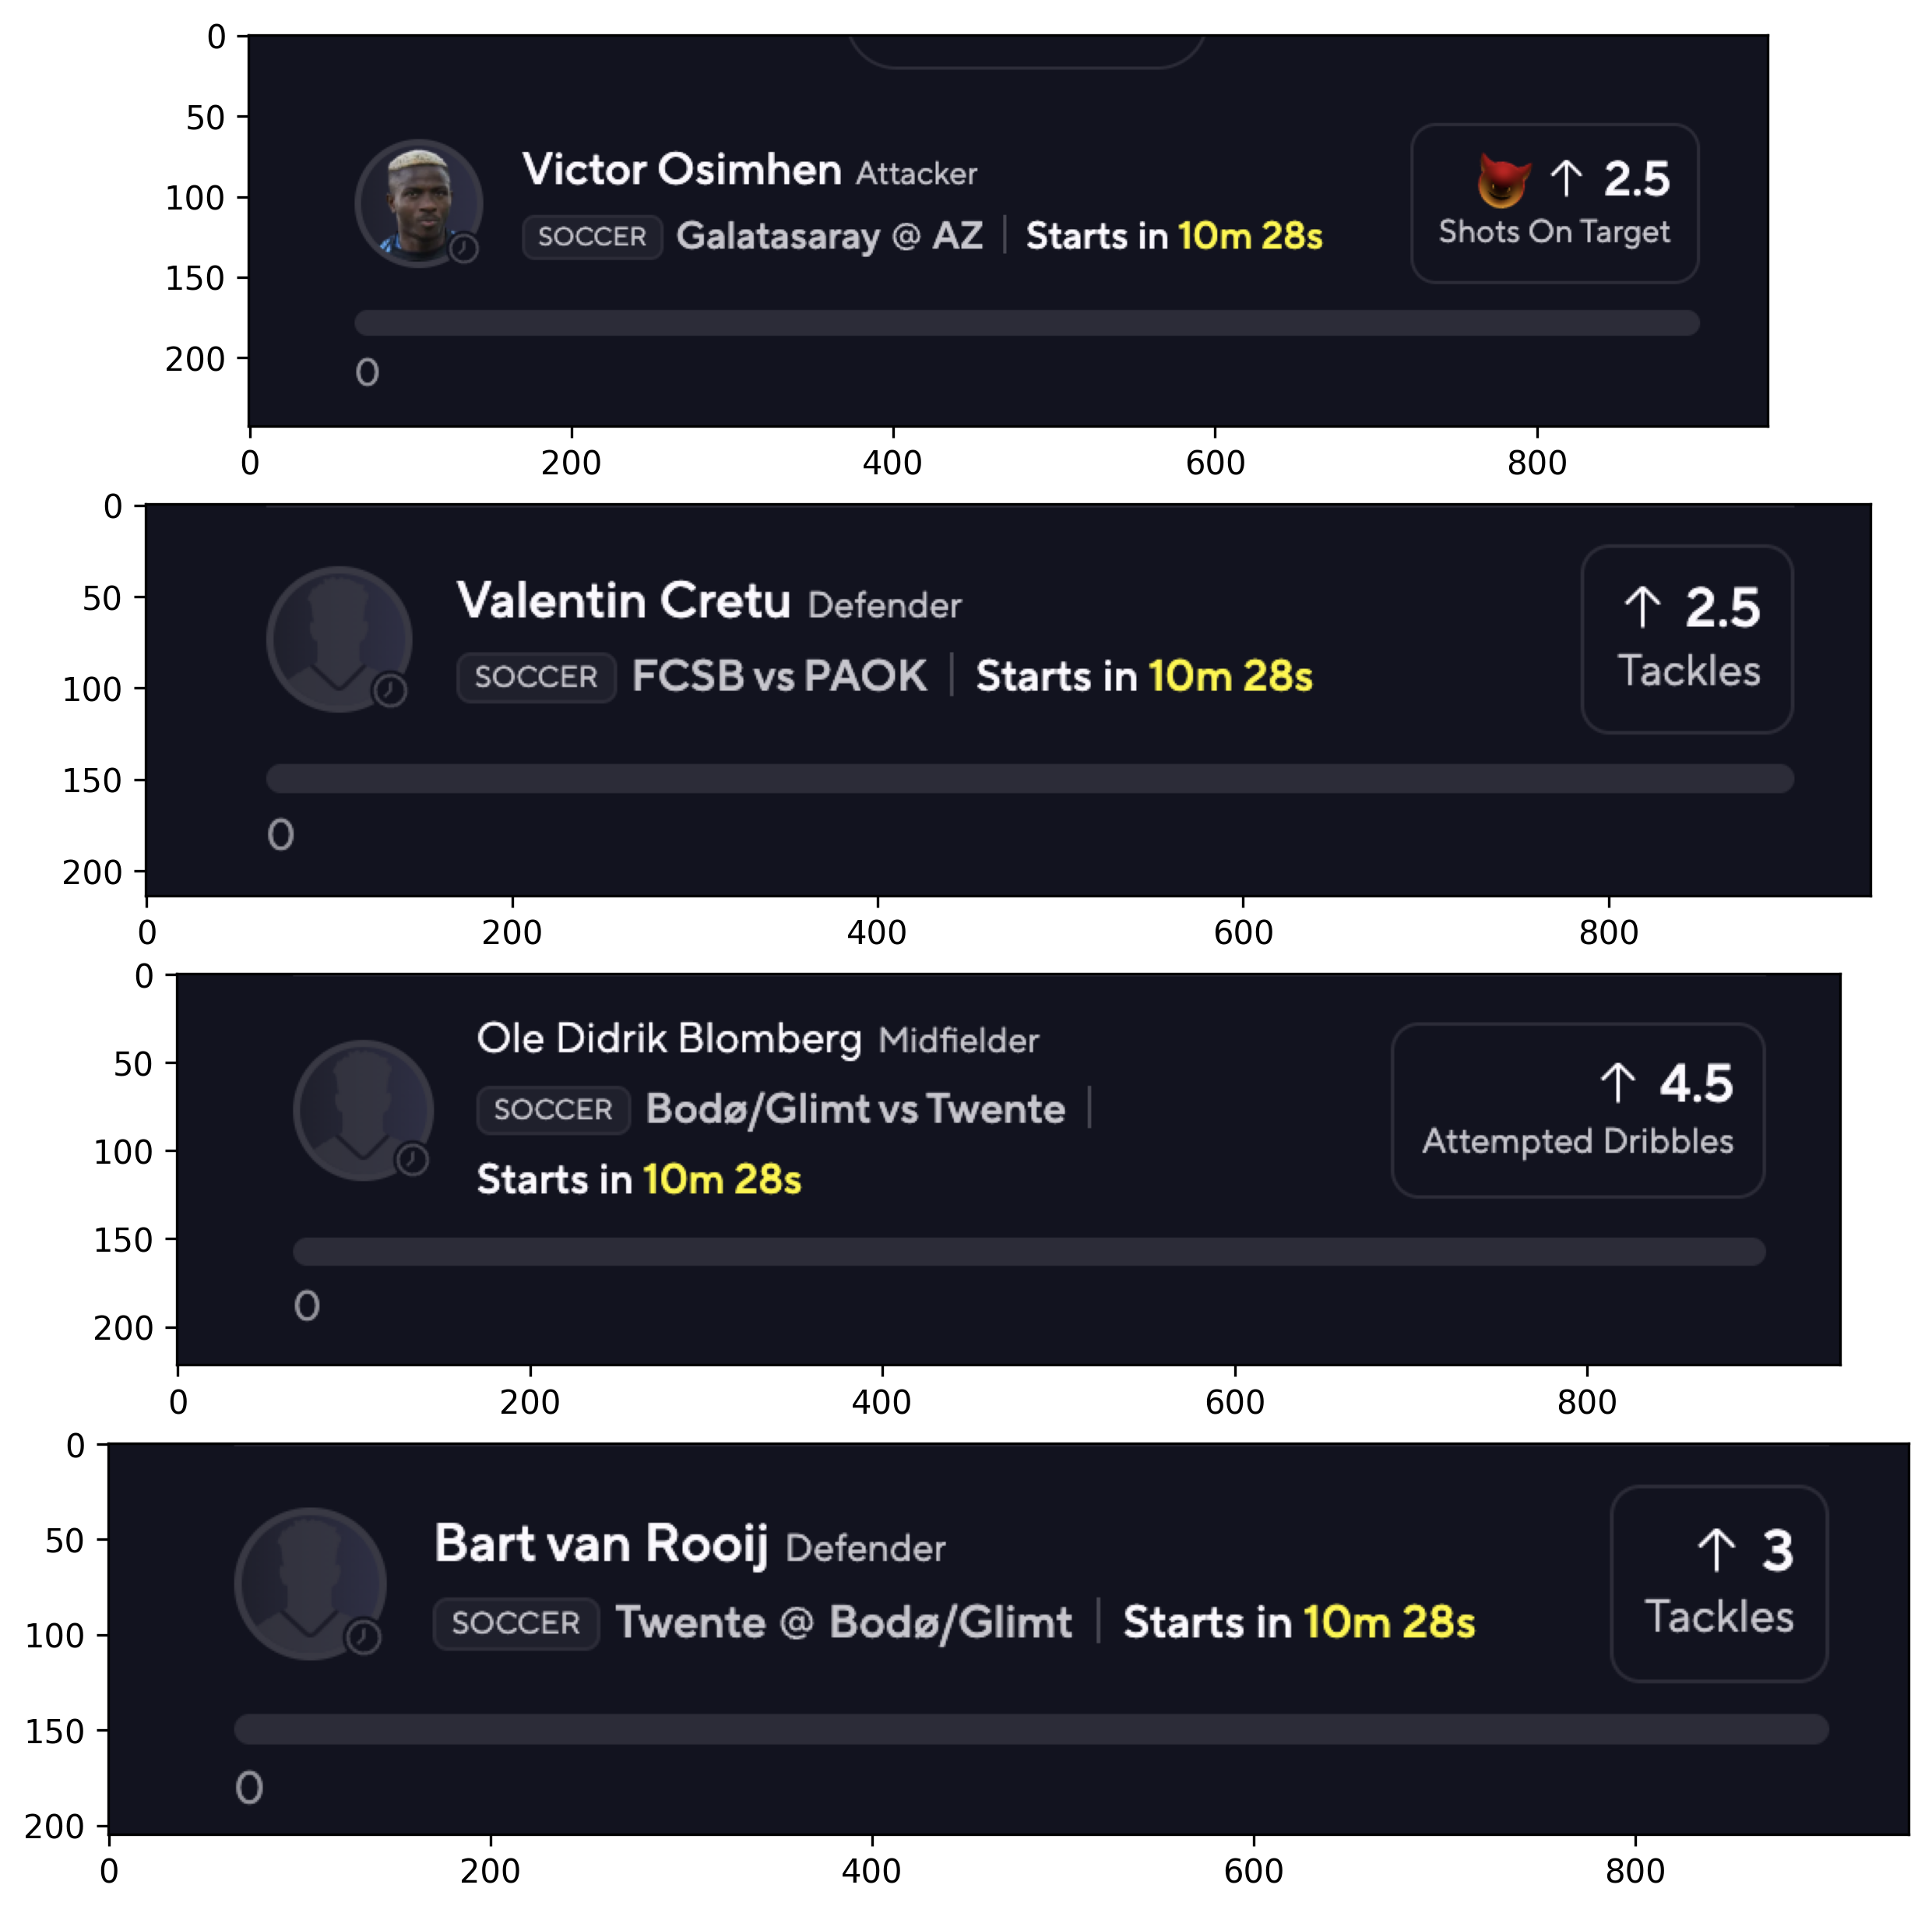

In [ ]:
img = cv2.imread('data/four.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
x = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# threshold
_, x = cv2.threshold(x, 25, 100, cv2.THRESH_BINARY)

# find all the horizontal lines
horizontal = x.copy()
cols = horizontal.shape[1]
horizontal_size = cols // 30
horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontal_size, 1))
horizontal = cv2.erode(horizontal, horizontalStructure)
horizontal = cv2.dilate(horizontal, horizontalStructure)

# filter out short lines by calling connectedComponentsWithStats
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(horizontal, connectivity=8)
for i in range(1, num_labels):
    if stats[i, cv2.CC_STAT_WIDTH] < cols // 3 or stats[i, cv2.CC_STAT_HEIGHT] > 5:
        horizontal[labels == i] = 0
        # remove the line from the stats
        stats[i, cv2.CC_STAT_AREA] = 0

# show stats filtering out 0 area
filtered_stats = np.sort(stats[1:][stats[1:, cv2.CC_STAT_AREA] > 0][:, cv2.CC_STAT_TOP])

# image partitions
partitions = []

starts = np.concatenate(([0], filtered_stats), axis=0)
ends = np.concatenate((filtered_stats, [horizontal.shape[0]]), axis=0)

for s, e in zip(starts, ends):
    partitions.append(img[s:e, :])

# show partitions in a graph
plt.figure(figsize=(10, 10))
for i, p in enumerate(partitions):
    plt.subplot(len(partitions), 1, i + 1)
    plt.imshow(p)
plt.show()
